# Klasifikasi Bunga Daisy, Dandelion, Rose, Sunflower, dan Tulip

# CNN (NON-PRETRAINED)

In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
ZIP_PATH = "dataset_uap.zip"
EXTRACT_PATH = "dataset_uap"

if not os.path.exists(EXTRACT_PATH):
    with zipfile.ZipFile(ZIP_PATH, "r") as zip_ref:
        zip_ref.extractall(EXTRACT_PATH)

print(os.listdir(EXTRACT_PATH))

DATASET_DIR = "dataset_uap/dataset_uap"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20


['dataset_uap']


In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

class_names = list(train_data.class_indices.keys())
num_classes = len(class_names)


Found 6767 images belonging to 5 classes.
Found 1688 images belonging to 5 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,957 (84.86 MB)

 Trainable params: 22,245,957 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 120s 528ms/step - accuracy: 0.3737 - loss: 1.5684 - val_accuracy: 0.5705 - val_loss: 1.0991
Epoch 2/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 105s 497ms/step - accuracy: 0.5786 - loss: 1.0608 - val_accuracy: 0.5948 - val_loss: 1.0124
Epoch 3/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 104s 490ms/step - accuracy: 0.6370 - loss: 0.9391 - val_accuracy: 0.6309 - val_loss: 0.9094
Epoch 4/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 104s 488ms/step - accuracy: 0.6596 - loss: 0.8922 - val_accuracy: 0.6481 - val_loss: 0.8950
Epoch 5/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 104s 490ms/step - accuracy: 0.6820 - loss: 0.8372 - val_accuracy: 0.6836 - val_loss: 0.8313
Epoch 6/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 102s 483ms/step - accuracy: 0.6983 - loss: 0.7753 - val_accuracy: 0.6765 - val_loss: 0.8203
Epoch 7/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 106s 501ms/step - accuracy: 0.7076 - loss: 0.7709 - val_accuracy: 0.7044 - val_loss: 0.7984
Epoch 8/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 101s 475ms/step - accuracy: 0.7229 -

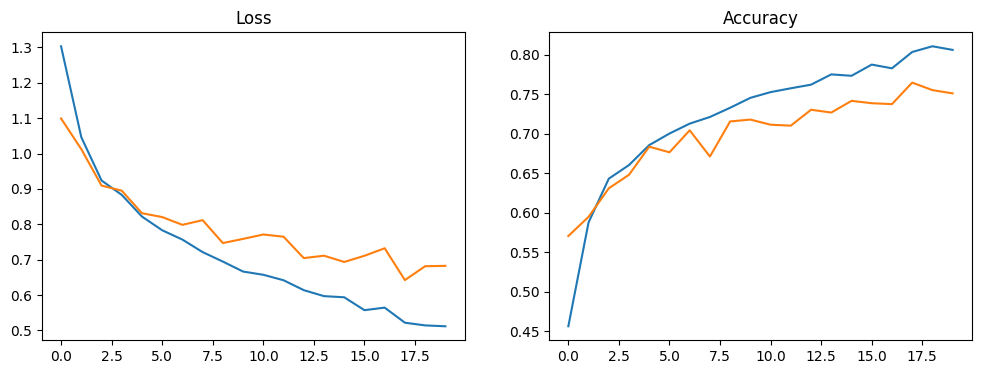

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")

plt.show()


In [8]:
val_data.reset()
pred = model.predict(val_data)
y_pred = np.argmax(pred, axis=1)
y_true = val_data.classes

53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 363ms/step


In [9]:
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


              precision    recall  f1-score   support

       daisy       0.86      0.77      0.81       300
   dandelion       0.75      0.86      0.80       409
        rose       0.70      0.67      0.68       308
   sunflower       0.82      0.87      0.84       286
       tulip       0.76      0.70      0.73       385

    accuracy                           0.77      1688
   macro avg       0.78      0.77      0.77      1688
weighted avg       0.77      0.77      0.77      1688



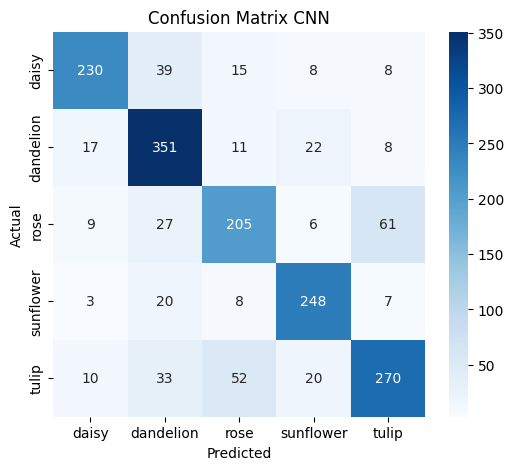

In [10]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix CNN")
plt.show()


In [22]:
os.makedirs("models", exist_ok=True)
model.save("models/cnn_flower_model.keras")


# MobileNetV2 transfer learning


In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (
    Input, GlobalAveragePooling2D,
    Dense, Dropout
)
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
datagen_mn = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

train_mn = datagen_mn.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_mn = datagen_mn.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

Found 6767 images belonging to 5 classes.
Found 1688 images belonging to 5 classes.


In [13]:
base_model_mn = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)
base_model_mn.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
inputs = Input(shape=(224,224,3))
x = base_model_mn(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation="softmax")(x)

model_mobilenet = Model(inputs, outputs)


In [15]:
model_mobilenet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_mobilenet.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [16]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history_mobilenet = model_mobilenet.fit(
    train_mn,
    validation_data=val_mn,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 149s 617ms/step - accuracy: 0.6371 - loss: 0.9477 - val_accuracy: 0.8217 - val_loss: 0.4971
Epoch 2/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 101s 477ms/step - accuracy: 0.8167 - loss: 0.4924 - val_accuracy: 0.8347 - val_loss: 0.4411
Epoch 3/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 100s 471ms/step - accuracy: 0.8511 - loss: 0.4053 - val_accuracy: 0.8507 - val_loss: 0.3886
Epoch 4/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 100s 472ms/step - accuracy: 0.8650 - loss: 0.3783 - val_accuracy: 0.8649 - val_loss: 0.3682
Epoch 5/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 100s 471ms/step - accuracy: 0.8689 - loss: 0.3513 - val_accuracy: 0.8667 - val_loss: 0.3505
Epoch 6/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 100s 473ms/step - accuracy: 0.8703 - loss: 0.3320 - val_accuracy: 0.8821 - val_loss: 0.3357
Epoch 7/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 101s 476ms/step - accuracy: 0.8928 - loss: 0.3052 - val_accuracy: 0.8673 - val_loss: 0.3433
Epoch 8/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 100s 473ms/step - accuracy: 0.8873 -

In [17]:
val_mn.reset()
pred = model_mobilenet.predict(val_mn)
y_pred = pred.argmax(axis=1)
y_true = val_mn.classes

53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 458ms/step


In [18]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

              precision    recall  f1-score   support

       daisy       0.93      0.88      0.91       300
   dandelion       0.91      0.94      0.92       409
        rose       0.91      0.83      0.87       308
   sunflower       0.93      0.92      0.92       286
       tulip       0.85      0.90      0.87       385

    accuracy                           0.90      1688
   macro avg       0.90      0.90      0.90      1688
weighted avg       0.90      0.90      0.90      1688



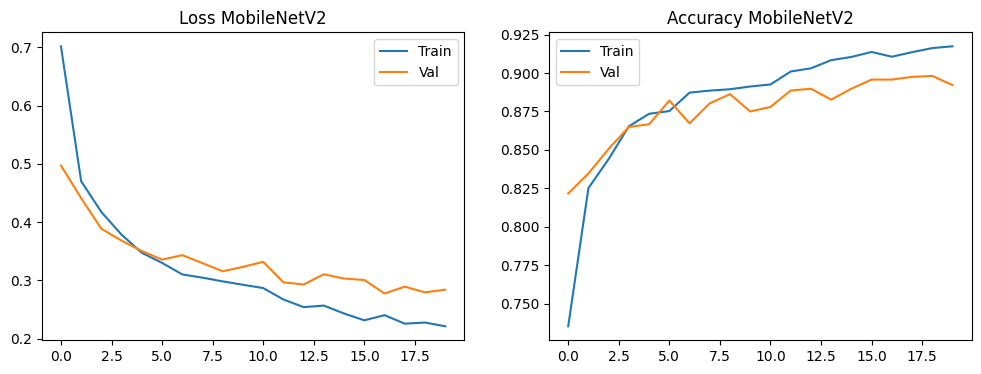

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_mobilenet.history["loss"], label="Train")
plt.plot(history_mobilenet.history["val_loss"], label="Val")
plt.title("Loss MobileNetV2")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_mobilenet.history["accuracy"], label="Train")
plt.plot(history_mobilenet.history["val_accuracy"], label="Val")
plt.title("Accuracy MobileNetV2")
plt.legend()

plt.show()

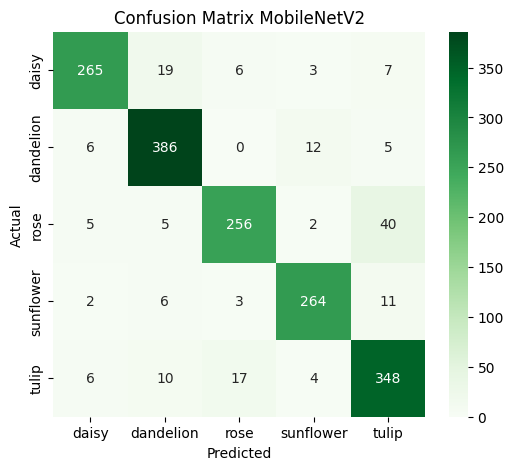

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="Greens"
)
plt.title("Confusion Matrix MobileNetV2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
model_mobilenet.save("models/mobilenetv2_flower_model.keras")

# EfficientNetB0 transfer learning

In [24]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess


In [25]:
datagen_eff = ImageDataGenerator(
    preprocessing_function=eff_preprocess,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

train_eff = datagen_eff.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_eff = datagen_eff.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

Found 6767 images belonging to 5 classes.
Found 1688 images belonging to 5 classes.


In [26]:
base_model_eff = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)
base_model_eff.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
inputs = Input(shape=(224,224,3))
x = base_model_eff(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation="softmax")(x)

model_effnet = Model(inputs, outputs)

In [28]:
model_effnet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_effnet.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,214,184 (16.08 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [29]:
history_effnet = model_effnet.fit(
    train_eff,
    validation_data=val_eff,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 155s 614ms/step - accuracy: 0.6962 - loss: 0.7926 - val_accuracy: 0.8572 - val_loss: 0.3868
Epoch 2/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 100s 471ms/step - accuracy: 0.8793 - loss: 0.3386 - val_accuracy: 0.8880 - val_loss: 0.3011
Epoch 3/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 98s 463ms/step - accuracy: 0.8997 - loss: 0.2853 - val_accuracy: 0.9040 - val_loss: 0.2704
Epoch 4/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 98s 464ms/step - accuracy: 0.9170 - loss: 0.2340 - val_accuracy: 0.9088 - val_loss: 0.2531
Epoch 5/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 100s 471ms/step - accuracy: 0.9250 - loss: 0.2085 - val_accuracy: 0.9094 - val_loss: 0.2424
Epoch 6/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 100s 472ms/step - accuracy: 0.9321 - loss: 0.1986 - val_accuracy: 0.9135 - val_loss: 0.2409
Epoch 7/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 98s 465ms/step - accuracy: 0.9289 - loss: 0.1847 - val_accuracy: 0.9135 - val_loss: 0.2407
Epoch 8/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 99s 469ms/step - accuracy: 0.9381 - los

In [30]:
val_eff.reset()
pred = model_effnet.predict(val_eff)
y_pred = pred.argmax(axis=1)
y_true = val_eff.classes

53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 488ms/step


In [31]:
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

              precision    recall  f1-score   support

       daisy       0.96      0.93      0.94       300
   dandelion       0.98      0.93      0.95       409
        rose       0.89      0.93      0.91       308
   sunflower       0.92      0.98      0.95       286
       tulip       0.90      0.91      0.90       385

    accuracy                           0.93      1688
   macro avg       0.93      0.93      0.93      1688
weighted avg       0.93      0.93      0.93      1688



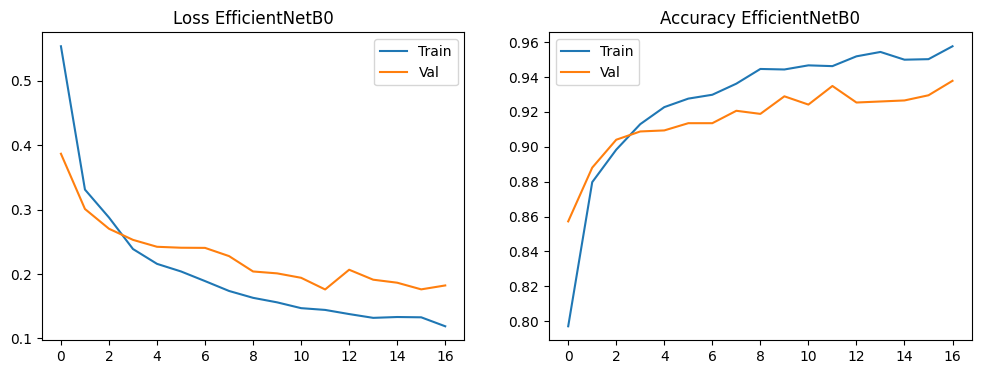

In [32]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_effnet.history["loss"], label="Train")
plt.plot(history_effnet.history["val_loss"], label="Val")
plt.title("Loss EfficientNetB0")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_effnet.history["accuracy"], label="Train")
plt.plot(history_effnet.history["val_accuracy"], label="Val")
plt.title("Accuracy EfficientNetB0")
plt.legend()

plt.show()

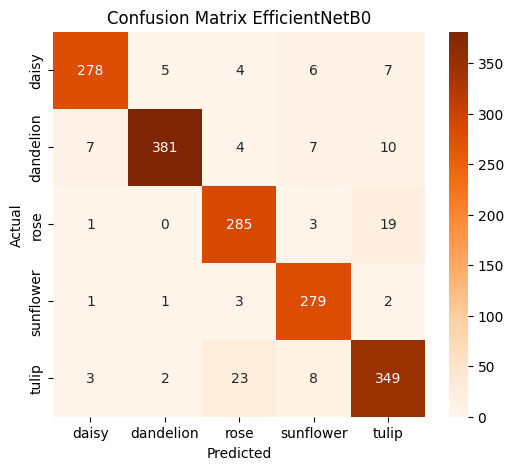

In [33]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="Oranges"
)
plt.title("Confusion Matrix EfficientNetB0")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
model_effnet.save("models/efficientnetb0_flower_model.keras")

# Download Models

In [35]:
import os

os.listdir("models")


['efficientnetb0_flower_model.keras',
 'cnn_flower_model.keras',
 'mobilenetv2_flower_model.keras']

In [36]:
import shutil

zip_name = "models_uap.zip"

if os.path.exists(zip_name):
    os.remove(zip_name)

shutil.make_archive(
    base_name="models_uap",
    format="zip",
    root_dir="models"
)

print("models folder zipped")

models folder zipped


In [37]:
from google.colab import files

files.download("models_uap.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Download Ke Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
!cp models_uap.zip /content/drive/MyDrive/